In [250]:
import pandas as pd

In [251]:
df1 = pd.read_csv(r'E:\ML Learning\PROJECT_SENTIMENT_ANALYSIS_WHITE_HOUSE\STEP_4_CORRELATION\data_files\roberta_scored_briefings.csv')
df2 = pd.read_csv(r'E:\ML Learning\PROJECT_SENTIMENT_ANALYSIS_WHITE_HOUSE\STEP_4_CORRELATION\data_files\approvalRating2.csv')

In [252]:
#CHANGE DF2 TO DATE TIME
df2['end_date'] = pd.to_datetime(df2['end_date'])

In [253]:
#w will analyze using the year-month as the approval rating is done monthly
df_roberta = df1.drop(['quarter', 'url'], axis = 1)
#drop duplicates / basic cleaning.
df_roberta = df_roberta.drop_duplicates()
df_roberta = df_roberta.dropna()
df_roberta

,content,roberta_neg,roberta_neu,roberta_pos,briefing_type,date,title
0,"President Joseph R. Biden, Jr. spoke today wit...",0.002994,0.155596,0.841410,Statements and Releases,2024-07-02,Readout of President Joe Biden’s Call with Pre...
1,1:50 P.M. EDTMS. JEAN-PIERRE: Hi. Good afterno...,0.023508,0.531409,0.445083,Press Briefings,2024-07-03,Press Briefing by Press Secretary Karine Jean-...
2,President Biden spoke this morning with Prime ...,0.005338,0.228428,0.766233,Statements and Releases,2024-07-04,Readout of President Joe Biden’s Call with Pri...
3,"The South LawnReverend Lee, the President and ...",0.019021,0.145596,0.835383,Speeches and Remarks,2024-07-04,Remarks as Prepared for Delivery by First Lady...
4,"With today’s report that 206,000 jobs were cre...",0.151755,0.456691,0.391554,Statements and Releases,2024-07-05,Statement from President Joe Biden on the June...
...,...,...,...,...,...,...,...
10735,President Biden and Vice President Harris are ...,0.010377,0.714800,0.274824,Statements and Releases,2024-06-26,Biden-⁠Harris Administration Announces the App...
10736,"– Today, Vice President Harris announced the r...",0.065244,0.560964,0.373792,Statements and Releases,2024-06-26,FACT SHEET: Vice President Harris Announces Fi...
10737,Our Nation has made tremendous progress in adv...,0.112505,0.658855,0.228641,Presidential Actions,2024-06-26,A Proclamation on Granting Pardon for Certain ...
10738,Every person in America should be able to acce...,0.019261,0.209876,0.770863,Statements and Releases,2024-06-26,Statement from Vice President Kamala Harris on...


In [254]:
# making the roberta scoring monthly
df_roberta['year_month'] = pd.PeriodIndex(df_roberta['date'] , freq = 'M')
#dropping the unused : content, title, date
df_roberta = df_roberta.drop(['content' , 'date', 'title',], axis = 1)


most_common_briefing = df_roberta.groupby(['year_month'])['briefing_type'].agg(pd.Series.mode)
most_common_briefing
#we can drop the briefing_type column since the most common briefing type for every month is statesment and release

year_month
2021-01       Presidential Actions
2021-02    Statements and Releases
2021-03    Statements and Releases
2021-04    Statements and Releases
2021-05    Statements and Releases
2021-06    Statements and Releases
2021-07    Statements and Releases
2021-08    Statements and Releases
2021-09    Statements and Releases
2021-10    Statements and Releases
2021-11    Statements and Releases
2021-12    Statements and Releases
2022-01    Statements and Releases
2022-02    Statements and Releases
2022-03    Statements and Releases
2022-04    Statements and Releases
2022-05    Statements and Releases
2022-06    Statements and Releases
2022-07    Statements and Releases
2022-08    Statements and Releases
2022-09    Statements and Releases
2022-10    Statements and Releases
2022-11    Statements and Releases
2022-12    Statements and Releases
2023-01    Statements and Releases
2023-02    Statements and Releases
2023-03    Statements and Releases
2023-04    Statements and Releases
2023-05  

In [255]:
#as the approval poll is performed monthly, we will analyze the data by month.
#add a year-month column to df2
#as we wont use the start date since it starts at the beginning of the month regardless, we will drop it
df2['year_month'] = pd.PeriodIndex(df2['end_date'], freq= 'M')
df_approval = df2.drop(['end_date','start_date' ] , axis = 1)
df_approval

,approving,disapproving,unsure,year_month
0,38,58,4,2024-06
1,39,56,5,2024-05
2,38,58,4,2024-04
3,40,55,5,2024-03
4,38,59,3,2024-02
5,41,54,5,2024-01
6,39,59,2,2023-12
7,37,59,4,2023-11
8,37,59,4,2023-10
9,41,58,1,2023-09


In [256]:
# as we can see, there are only 40 data points representing 40 months ever since Biden took office. Thus, consolidating the scoring data from Roberta to monthly is the choice i go with

#finding the mean for the report 
df_roberta_agg = df_roberta.groupby('year_month' , as_index=False).agg({"roberta_neg" :['mean']
                                                       ,"roberta_neu":['mean']
                                                       ,"roberta_pos":['mean']}).droplevel(1, axis=1)
df_roberta_agg

,year_month,roberta_neg,roberta_neu,roberta_pos
0,2021-01,0.157980,0.559022,0.282999
1,2021-02,0.129722,0.496442,0.373837
2,2021-03,0.123294,0.479990,0.396716
3,2021-04,0.098924,0.486401,0.414675
4,2021-05,0.110462,0.511549,0.377989
5,2021-06,0.097809,0.462875,0.439315
6,2021-07,0.109535,0.501684,0.388781
7,2021-08,0.092111,0.522088,0.385801
8,2021-09,0.105425,0.484207,0.410368
9,2021-10,0.083667,0.482015,0.434317


In [257]:
#as the census data does not include : 2024-07 and 2022-11, we drop those from roberta
# Create Period objects for the months we want to drop
periods_to_drop = [pd.Period('2024-07', freq='M'), pd.Period('2022-11', freq='M')]

# Filter the DataFrame
df_roberta_agg = df_roberta_agg[~df_roberta_agg['year_month'].isin(periods_to_drop)]

In [258]:
df_roberta_agg



,year_month,roberta_neg,roberta_neu,roberta_pos
0,2021-01,0.157980,0.559022,0.282999
1,2021-02,0.129722,0.496442,0.373837
2,2021-03,0.123294,0.479990,0.396716
3,2021-04,0.098924,0.486401,0.414675
4,2021-05,0.110462,0.511549,0.377989
5,2021-06,0.097809,0.462875,0.439315
6,2021-07,0.109535,0.501684,0.388781
7,2021-08,0.092111,0.522088,0.385801
8,2021-09,0.105425,0.484207,0.410368
9,2021-10,0.083667,0.482015,0.434317


In [259]:
# merging the 2 dataset:
df_approval = df_approval.set_index('year_month').sort_values(by=['year_month'], ascending=True)
df_approval

,approving,disapproving,unsure
year_month,,,
2021-01,57,37,6
2021-02,56,40,4
2021-03,54,42,4
2021-04,57,40,3
2021-05,54,40,6
2021-06,56,42,2
2021-07,50,45,5
2021-08,49,48,3
2021-09,43,55,2


In [260]:
#merging dataframe
merged_df = pd.merge(df_approval, df_roberta_agg, on='year_month', how='outer')

In [261]:
merged_df

,year_month,approving,disapproving,unsure,roberta_neg,roberta_neu,roberta_pos
0,2021-01,57,37,6,0.157980,0.559022,0.282999
1,2021-02,56,40,4,0.129722,0.496442,0.373837
2,2021-03,54,42,4,0.123294,0.479990,0.396716
3,2021-04,57,40,3,0.098924,0.486401,0.414675
4,2021-05,54,40,6,0.110462,0.511549,0.377989
5,2021-06,56,42,2,0.097809,0.462875,0.439315
6,2021-07,50,45,5,0.109535,0.501684,0.388781
7,2021-08,49,48,3,0.092111,0.522088,0.385801
8,2021-09,43,55,2,0.105425,0.484207,0.410368
9,2021-10,42,52,6,0.083667,0.482015,0.434317


In [262]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

main_df = merged_df

In [263]:
#OUTLOOK:
#THE MAIN AIM OF THIS DATAFRAME IS TO LOOK AT THE CORRELATION BETWEEN THE APPROVAL 
#RATING AND THE SENTIMENT SCORE OF WHITE HOUSE'S BRIEFING

In [264]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   year_month    41 non-null     period[M]
 1   approving     41 non-null     int64    
 2   disapproving  41 non-null     int64    
 3   unsure        41 non-null     int64    
 4   roberta_neg   41 non-null     float64  
 5   roberta_neu   41 non-null     float64  
 6   roberta_pos   41 non-null     float64  
dtypes: float64(3), int64(3), period[M](1)
memory usage: 2.4 KB


In [265]:
#Looking at the data
main_df.describe()
#On average, Biden's approval rating is more inclined towards being disapproving. When it comes to the briefing language however, on the surface, neutral and positive language are used
#language used in briefing does not deviate much, in contrary to the approval rating which swing quite drastically.


,approving,disapproving,unsure,roberta_neg,roberta_neu,roberta_pos
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,43.048780,53.048780,3.926829,0.110389,0.464378,0.425234
std,5.920098,6.135761,1.212234,0.019835,0.032447,0.041894
min,37.000000,37.000000,1.000000,0.069269,0.413090,0.282999
25%,40.000000,53.000000,3.000000,0.098111,0.438830,0.396716
50%,41.000000,55.000000,4.000000,0.105425,0.460620,0.434317
75%,43.000000,57.000000,5.000000,0.122589,0.486191,0.447809
max,57.000000,59.000000,6.000000,0.157980,0.559022,0.509032


In [266]:
#check for missing data
for col in main_df.columns:
    percent_missing = np.mean(main_df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

year_month - 0.0%
approving - 0.0%
disapproving - 0.0%
unsure - 0.0%
roberta_neg - 0.0%
roberta_neu - 0.0%
roberta_pos - 0.0%


In [267]:

#round to 2 decimals
main_df = main_df.round(decimals = 3)
main_df

,year_month,approving,disapproving,unsure,roberta_neg,roberta_neu,roberta_pos
0,2021-01,57,37,6,0.158,0.559,0.283
1,2021-02,56,40,4,0.130,0.496,0.374
2,2021-03,54,42,4,0.123,0.480,0.397
3,2021-04,57,40,3,0.099,0.486,0.415
4,2021-05,54,40,6,0.110,0.512,0.378
5,2021-06,56,42,2,0.098,0.463,0.439
6,2021-07,50,45,5,0.110,0.502,0.389
7,2021-08,49,48,3,0.092,0.522,0.386
8,2021-09,43,55,2,0.105,0.484,0.410
9,2021-10,42,52,6,0.084,0.482,0.434


In [268]:
main_df.sort_values(by = ['roberta_pos'], inplace = False, ascending = False)
# most positive month for the briefing is 2022-12, followed closely by 2023-11


,year_month,approving,disapproving,unsure,roberta_neg,roberta_neu,roberta_pos
22,2022-12,40,55,5,0.069,0.422,0.509
33,2023-11,37,59,4,0.081,0.416,0.504
29,2023-07,40,55,4,0.092,0.423,0.485
28,2023-06,43,54,3,0.102,0.413,0.485
20,2022-09,42,56,2,0.080,0.451,0.469
39,2024-05,39,56,5,0.104,0.435,0.461
10,2021-11,42,55,3,0.092,0.451,0.456
16,2022-05,41,54,5,0.101,0.445,0.454
23,2023-01,41,54,4,0.104,0.442,0.454
27,2023-05,39,57,5,0.124,0.425,0.451


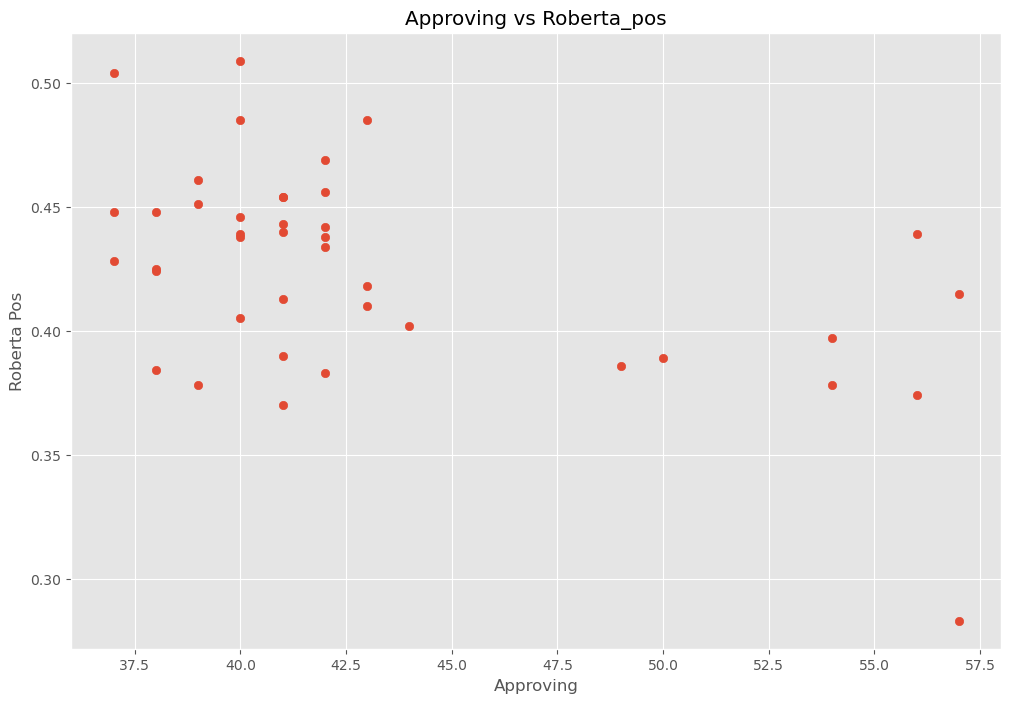

In [269]:

main_df

#scatter plot between approving and roberta_pos : hstil cant see for sure, proceed to reg plot
plt.scatter(x=main_df['approving'], y=main_df['roberta_pos'])
plt.title("Approving vs Roberta_pos")
plt.xlabel('Approving')
plt.ylabel('Roberta Pos')
plt.show()


<Axes: xlabel='approving', ylabel='roberta_neu'>

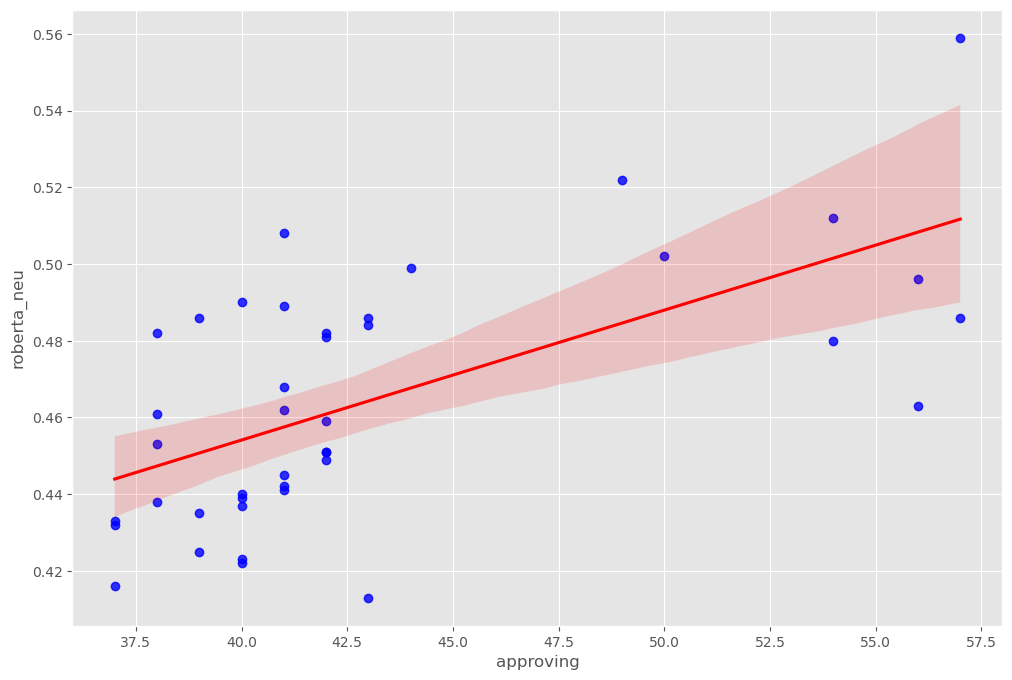

In [270]:
#Plotting approving and roberta_pos
# sns.regplot(x='approving', y = 'roberta_pos', data = main_df , scatter_kws={"color" : "blue"} , line_kws={"color" : "red"}) #Likely no correlation
# sns.regplot(x='disapproving', y = 'roberta_neg', data = main_df , scatter_kws={"color" : "blue"} , line_kws={"color" : "red"}) #Slight likelyhood of correlation
sns.regplot(data = main_df, x = 'approving', y= 'roberta_neu', scatter_kws={"color" : "blue"} , line_kws={"color" : "red"}) #Might be correlated

#Hypothetical explanation : As the perception of people remain positive, the public relation department of the White House potentially see that what they were doing is working and keep using the neutral language.

<function matplotlib.pyplot.show(close=None, block=None)>

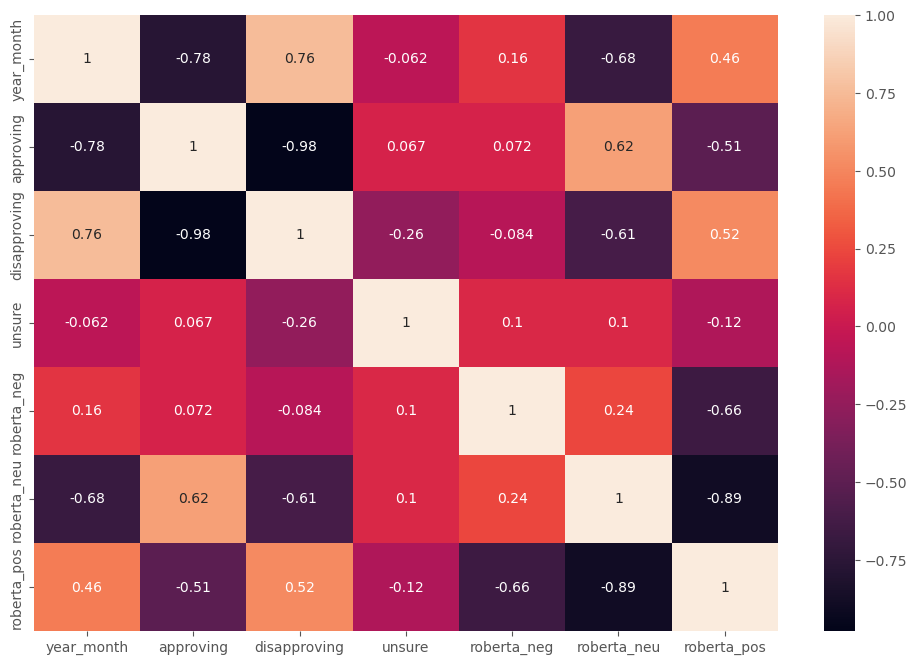

In [276]:
#converting to string for correlation
main_df['year_month'] = main_df['year_month'].index.to_series().astype(str)

heatmap = sns.heatmap(main_df.corr(method = 'pearson'), annot=True)
plt.show

In [272]:
main_df

,year_month,approving,disapproving,unsure,roberta_neg,roberta_neu,roberta_pos
0,2021-01,57,37,6,0.158,0.559,0.283
1,2021-02,56,40,4,0.130,0.496,0.374
2,2021-03,54,42,4,0.123,0.480,0.397
3,2021-04,57,40,3,0.099,0.486,0.415
4,2021-05,54,40,6,0.110,0.512,0.378
5,2021-06,56,42,2,0.098,0.463,0.439
6,2021-07,50,45,5,0.110,0.502,0.389
7,2021-08,49,48,3,0.092,0.522,0.386
8,2021-09,43,55,2,0.105,0.484,0.410
9,2021-10,42,52,6,0.084,0.482,0.434
